In [3]:
# Python Project Template
# 1. Prepare Problem
# a) Load libraries
# b) Load dataset
# 2. Summarize Data
# a) Descriptive statistics
# b) Data visualizations
# 3. Prepare Data
# a) Data Cleaning
# b) Feature Selection
# c) Data Transforms
# 4. Evaluate Algorithms
# a) Split-out validation dataset
# b) Test options and evaluation metric
# c) Spot Check Algorithms
# d) Compare Algorithms
# 5. Improve Accuracy
# a) Algorithm Tuning
# b) Ensembles
# 6. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset
# c) Save model for later use

## Load libraries

In [4]:
# Load libraries
# import numpy, pandas, scipy, math, matplotlib
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from math import sqrt
from pandas.plotting import scatter_matrix

# estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# training and cross-validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score



### Load the dataset

In [5]:
# Load dataset
rawData = pd.read_csv('default of credit card clients_revised.csv', header =1)
rawData

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [6]:
pwd

'C:\\Users\\nsrid\\OneDrive\\Documents\\UT Datascience certification\\My_Jupyter_notebooks'

In [7]:
rawData.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_1                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [8]:
rawData.head

<bound method NDFrame.head of        LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BI

In [9]:
corrMat = rawData.corr()
print(corrMat)

                            LIMIT_BAL       SEX  EDUCATION  MARRIAGE  \
LIMIT_BAL                    1.000000  0.024755  -0.219161 -0.108139   
SEX                          0.024755  1.000000   0.014232 -0.031389   
EDUCATION                   -0.219161  0.014232   1.000000 -0.143464   
MARRIAGE                    -0.108139 -0.031389  -0.143464  1.000000   
AGE                          0.144713 -0.090874   0.175061 -0.414170   
PAY_1                       -0.271214 -0.057643   0.105364  0.019917   
PAY_2                       -0.296382 -0.070771   0.121566  0.024199   
PAY_3                       -0.286123 -0.066096   0.114025  0.032688   
PAY_4                       -0.267460 -0.060173   0.108793  0.033122   
PAY_5                       -0.249411 -0.055064   0.097520  0.035629   
PAY_6                       -0.235195 -0.044008   0.082316  0.034345   
BILL_AMT1                    0.285430 -0.033642   0.023581 -0.023472   
BILL_AMT2                    0.278314 -0.031183   0.018749 -0.02

## Feature engineering
#### Creating variable names for certain columns, rows, range of columns and rows in the dataframe

In [10]:
#features
features = rawData.iloc[:,13:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,689,0,0,0,0,689,0,0,0,0
1,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,35835,20940,19146,19131,2000,36681,10000,9000,689,679


### Cleaned up dataset for model evaluation and classification

In [11]:
# axis=1 means the column axis
Cleanedup_feature = rawData
Cleanedup_feature
# This is the new cleaned up dataset

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Establish training and testing data set
##### Measuring Success: Splitting up the data for train and test set
##### Split the dataset up into the following segments:
#####  Training Data: 70%
##### Test Data: 30%

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

#### Split into train and test set

In [13]:
print(len(Cleanedup_feature))

30000


In [14]:
# Creating a sub-set for training-testing
Cleaned_subset = (Cleanedup_feature[:1000])
print(len(Cleaned_subset))

1000


In [15]:
features = Cleaned_subset.iloc[:,13:23]
# features is the dataframe with independent variables after feature engineering
labels = Cleaned_subset['PAY_AMT6']
# labels is the dataframe for the dependent variable

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [16]:
print(len(labels), len(y_train), len(y_test))

1000 700 300


In [17]:
for dataset in [y_train, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.7
0.3


In [18]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [19]:
# cross validation results using the training set 
# This is for RF model
scores = cross_val_score(modelRF, X_train, y_train.values.ravel(), cv=10)
scores
# What you are seeing below in the output is the individual k-fold score.

array([0.42424548, 0.99870704, 0.96349885, 0.99985028, 0.90731415,
       0.92210739, 0.99956407, 0.95523746, 0.99893256, 0.99807392])

In [20]:
# Doing evaluation for the same training set for all the three models
modelRF.fit(X_train,y_train)
modelSVR.fit(X_train,y_train)
modelLR.fit(X_train,y_train)

print(cross_val_score(modelRF, X_train, y_train)) 
print(cross_val_score(modelSVR, X_train, y_train)) 
print(cross_val_score(modelLR, X_train, y_train)) 

[0.43367884 0.99214955 0.79637847 0.99486458 0.99793713]
[-0.01367671 -0.04070068 -0.07053552 -0.02869479 -0.12315924]
[1. 1. 1. 1. 1.]


#### The other option is to Spot-Check Algorithms by measuring the mean and std dev across all the folds for each model

In [21]:
models = []
models.append(('LR', modelLR))
models.append(('RF', modelRF))
models.append(('SVR', modelSVR))
# evaluate each model in turn

In [22]:
# Evaluate each model in turn to get the mean and std dev for each algorithm
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=10)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 1.000000 (0.000000)
RF: 0.900114 (0.180872)
SVR: -0.088018 (0.043661)


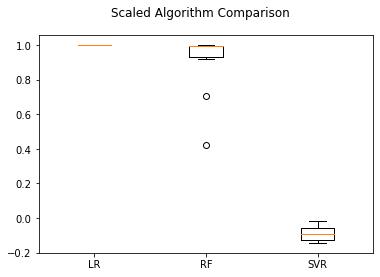

In [23]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Based on the results, modelRF is the best.
#### Now, lets do further to see if we can improve the accuracy by doing hyperparameter tuning of the RF model
##### using gridSearch

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
# Defining a function to simply view the different tuned results
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [26]:
# Perfomring Grid Search
modelRF = RandomForestRegressor()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

cv = GridSearchCV(modelRF, parameters, cv=10)
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'max_depth': None, 'n_estimators': 50}

0.607 (+/-0.347) for {'max_depth': 2, 'n_estimators': 5}
0.603 (+/-0.437) for {'max_depth': 2, 'n_estimators': 50}
0.617 (+/-0.453) for {'max_depth': 2, 'n_estimators': 100}
0.902 (+/-0.307) for {'max_depth': 10, 'n_estimators': 5}
0.921 (+/-0.326) for {'max_depth': 10, 'n_estimators': 50}
0.929 (+/-0.339) for {'max_depth': 10, 'n_estimators': 100}
0.911 (+/-0.323) for {'max_depth': 20, 'n_estimators': 5}
0.929 (+/-0.332) for {'max_depth': 20, 'n_estimators': 50}
0.924 (+/-0.352) for {'max_depth': 20, 'n_estimators': 100}
0.909 (+/-0.359) for {'max_depth': None, 'n_estimators': 5}
0.931 (+/-0.333) for {'max_depth': None, 'n_estimators': 50}
0.907 (+/-0.34) for {'max_depth': None, 'n_estimators': 100}


### Now let us evaluate the fine tuned model on unseen data which is the 'test' data which is the remaining 300 datapoints
#### Here we will use additional metrics such as precision and recall
#### Metrics used here on unseen data are: Accuracy score, precision and recall

In [27]:
# Picking the top 3 results from the hyper-parameter combination and run this through the whole training set
# This implies 100% instead of 90% based on 10 fold CV. It would have been 80% based on 5 fold CV.

rf1 = RandomForestRegressor(n_estimators=100, max_depth=10)
rf1.fit(X_train, y_train.values.ravel())

rf2 = RandomForestRegressor(n_estimators=20, max_depth=50)
rf2.fit(X_train, y_train.values.ravel())

rf3 = RandomForestRegressor(n_estimators=100, max_depth=None)
rf3.fit(X_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## Doing evaluation on test (unseen data)
#### So far, this is based on training data only. We will take the 3 best hypertuned models and check on test( unseen data) and look for overfitting, underfitting in addition to accuracy using precision and recall, if possible

In [35]:
for mdl in [rf1, rf2, rf3]:
    y_pred = mdl.predict(X_test)
    predRsquared = r2_score(y_test,y_pred)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    print('R Squared: %.3f' % predRsquared)
    print('RMSE: %.3f' % rmse)
    print('MAX DEPTH: {} / # OF EST: {} /--R Squared: {}/--RSME: {}'.format(mdl.max_depth,
                                                        mdl.n_estimators,
                                                        predRsquared,
                                                        rmse))


R Squared: 0.904
RMSE: 7434.962
MAX DEPTH: 10 / # OF EST: 100 /--R Squared: 0.9039847543477101/--RSME: 7434.96237054128
R Squared: 0.828
RMSE: 9941.630
MAX DEPTH: 50 / # OF EST: 20 /--R Squared: 0.8283286419727719/--RSME: 9941.630037247414
R Squared: 0.912
RMSE: 7136.059
MAX DEPTH: None / # OF EST: 100 /--R Squared: 0.9115496491315765/--RSME: 7136.059395714556


### Now we are ready to do prediction on the rest of the unseen data which is validation data

In [41]:
# this is the complete dataframe without the first 1000 rows that was used for training and testing. 
# THis is for remaining 29000 rows 
# This is the rest of the unseen data that is also called validation data
valid_df = rawData.drop(rawData.index[:1000])
print(len(valid_df))
valid_features = valid_df.iloc[:,13:23]
# features is the dataframe with independent variables after feature engineering
valid_depvar = valid_df['PAY_AMT6']
print(len(valid_depvar))
# labels is the dataframe for the dependent variable

29000
29000


In [42]:
y_pred = rf3.predict(valid_features)
predRsquared = r2_score(valid_depvar,y_pred)
rmse = sqrt(mean_squared_error(valid_depvar, y_pred))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.893
RMSE: 5737.614


In [43]:
y_pred

array([   0.  , 1506.28,    0.  , ..., 3059.03, 1794.78, 1000.47])